In [17]:
#loading the data set
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train:  (50000, 32, 32, 3)


In [37]:
std=0.1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print(Ntr)
batch_size = Ntr

iterations =300
lr =1.4e-6
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]
    # Forward pass
    y_pred=x.dot(w1)+b1
    loss= 1./batch_size*np.square(y_pred-y).sum() + reg*(np.sum(w1*w1))
    loss_history.append(loss)
    if t%10==0:
        print(t,loss,iterations)
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred) + reg*w1
    
    db1=dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay


w1: (3072, 10)
b1: (10,)
50000
0 0.999999740504922 300
10 0.9999214978960509 300
20 0.9998441766100536 300
30 0.9997677642838966 300
40 0.9996922487528163 300
50 0.9996176180464629 300
60 0.9995438603851244 300
70 0.9994709641760425 300
80 0.9993989180098132 300
90 0.9993277106568696 300
100 0.9992573310640437 300
110 0.9991877683512069 300
120 0.9991190118079895 300
130 0.9990510508905683 300
140 0.9989838752185344 300
150 0.9989174745718249 300
160 0.9988518388877249 300
170 0.9987869582579377 300
180 0.9987228229257196 300
190 0.9986594232830771 300
200 0.9985967498680265 300
210 0.9985347933619134 300
220 0.9984735445867916 300
230 0.9984129945028591 300
240 0.9983531342059483 300
250 0.9982939549250736 300
260 0.9982354480200268 300
270 0.9981776049790314 300
280 0.9981204174164422 300
290 0.9980638770704919 300


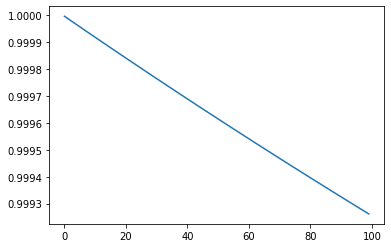

In [36]:
plt.plot(loss_history)

In [30]:
# Printing accuracies
x_t=x_train
y_pred=x_t.dot(w1)+b1
train_acc= 1.0 - 1/Ntr*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred,axis=1))).sum()
print("train_acc - ",train_acc)

x_t=x_test
y_pred=x_t.dot(w1)+b1
test_acc= 1.0 - 1/Nte*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred,axis=1))).sum()
print("test_acc - ",test_acc)

train_acc -  -1.8717000000000001
test_acc -  -1.8363


In [35]:
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(3):
    indices = np.arange(5)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]
    print(len(indices))
    print(x,x.shape)
    print(y,y.shape)

5
[[ 0.48740888  0.46644652  0.4801812  ... -0.18289836 -0.15627569
  -0.11914455]
 [ 0.15407553  0.17232886  0.25665176 ... -0.21034934 -0.1915698
  -0.13483082]
 [-0.4027872  -0.43551427 -0.48060313 ... -0.2142709  -0.23862863
  -0.26816416]
 [-0.2812186  -0.29041624 -0.27276    ... -0.0142709  -0.13274628
  -0.16620338]
 [ 0.09133043  0.16056415  0.2135145  ...  0.06416047  0.02803804
   0.11614957]] (5, 3072)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] (5, 10)
5
[[ 0.15407553  0.17232886  0.25665176 ... -0.21034934 -0.1915698
  -0.13483082]
 [ 0.09133043  0.16056415  0.2135145  ...  0.06416047  0.02803804
   0.11614957]
 [ 0.48740888  0.46644652  0.4801812  ... -0.18289836 -0.15627569
  -0.11914455]
 [-0.2812186  -0.29041624 -0.27276    ... -0.0142709  -0.13274628
  -0.16620338]
 [-0.4027872  -0.43551427 -0.48060313 ... -0.2142709  -0.23862863
  -0.26816416]] (5

In [ ]:
# displaying w as images #not completed
f,axarr=plt.subplots(1,10)
f.set_size_inches(16,6)
for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show